<b><font size="6">Predictive Modelling Pipeline Template</font></b><br><br>

In this notebook we present to you the main steps you should follow throughout your project.


<b> Important: The numbered sections and subsections are merely indicative of some of the steps you should pay attention to in your project. <br>You are not required to strictly follow this order or to execute everything in separate cells.</b>
    
<img src="../image/process_ML.png" style="height:70px">

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score
import optuna
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

c:\Users\User\anaconda3\envs\IMS_ML\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<a class="anchor" id="">

# 1. Import data (Data Integration)

</a>


<img src="../image/step1.png" style="height:60px">

In [26]:
# Load the data
obesity_train_raw = pd.read_csv('../data/obesity_train.csv')
obesity_test_raw = pd.read_csv('../data/obesity_test.csv') 

In [4]:
obesity_train_raw.head(10)

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,...,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
0,1,21.0,Never,no,up to 5,Sometimes,Female,1.62,NaN,3.0,...,yes,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,64.0,Normal_Weight
1,2,23.0,Frequently,no,up to 5,Sometimes,Male,1.80,NaN,3.0,...,yes,3 to 4,LatAm,0.0,no,Public,Sometimes,1 to 2,77.0,Normal_Weight
2,3,NaN,Frequently,no,up to 2,Sometimes,Male,1.80,NaN,3.0,...,no,3 to 4,LatAm,2.0,no,Walk,Always,1 to 2,87.0,Overweight_Level_I
3,4,22.0,Sometimes,no,up to 2,Sometimes,Male,1.78,NaN,1.0,...,no,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,90.0,Overweight_Level_II
4,5,22.0,Sometimes,no,up to 2,Sometimes,Male,1.64,NaN,3.0,...,no,5 or more,LatAm,3.0,no,Public,Sometimes,1 to 2,53.0,Normal_Weight
5,6,24.0,Frequently,yes,up to 5,Sometimes,Male,1.78,NaN,3.0,...,yes,1 to 2,LatAm,2.0,no,Public,Always,1 to 2,64.0,Normal_Weight
6,7,21.0,Sometimes,yes,up to 5,Frequently,Female,1.72,NaN,3.0,...,yes,3 to 4,NaN,2.0,no,Public,Sometimes,1 to 2,80.0,Overweight_Level_II
7,8,22.0,Sometimes,no,up to 2,Sometimes,Male,1.65,NaN,3.0,...,no,3 to 4,LatAm,1.0,no,Public,Always,more than 2,56.0,Normal_Weight
8,9,41.0,Frequently,yes,up to 5,Sometimes,Male,1.80,NaN,3.0,...,no,3 to 4,LatAm,0.0,no,Car,Sometimes,1 to 2,99.0,Obesity_Type_I
9,10,27.0,Sometimes,yes,up to 2,Sometimes,Male,1.93,NaN,1.0,...,yes,1 to 2,LatAm,2.0,no,Public,Sometimes,less than 1,102.0,Overweight_Level_II


In [5]:
obesity_test_raw.head(10)

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight
0,1612,21.0,Sometimes,no,up to 2,Sometimes,Female,1.52,NaN,3.0,yes,yes,5 or more,LatAm,3.0,yes,Public,Always,more than 2,56.0
1,1613,29.0,Sometimes,yes,up to 2,Sometimes,Male,1.62,NaN,3.0,no,no,NaN,LatAm,3.0,no,Car,Sometimes,1 to 2,53.0
2,1614,23.0,Sometimes,NaN,up to 2,Sometimes,Female,1.50,NaN,3.0,no,yes,1 to 2,LatAm,2.0,no,Motorbike,Always,1 to 2,NaN
3,1615,22.0,Never,yes,up to 5,Sometimes,Male,1.72,NaN,3.0,no,yes,1 to 2,LatAm,1.0,no,Public,Sometimes,1 to 2,68.0
4,1616,26.0,Sometimes,yes,more than 5,Frequently,Male,1.85,NaN,3.0,no,yes,3 to 4,LatAm,1.0,no,Public,Always,more than 2,105.0
5,1617,23.0,Sometimes,yes,up to 5,Sometimes,Male,1.77,NaN,1.0,no,yes,1 to 2,LatAm,2.0,no,Public,Always,less than 1,60.0
6,1618,22.0,Sometimes,no,up to 5,Always,Female,1.70,NaN,3.0,yes,yes,3 to 4,LatAm,1.0,no,Public,Always,1 to 2,NaN
7,1619,29.0,Never,yes,up to 2,Sometimes,Female,1.53,NaN,1.0,no,no,NaN,LatAm,0.0,no,Car,Sometimes,1 to 2,78.0
8,1620,30.0,Never,yes,up to 2,Frequently,Female,1.71,NaN,4.0,no,yes,NaN,LatAm,0.0,yes,Car,Always,less than 1,82.0
9,1621,23.0,Sometimes,yes,up to 5,Frequently,Female,1.60,NaN,4.0,no,no,3 to 4,LatAm,3.0,no,Car,Sometimes,1 to 2,52.0


<a class="anchor" id="">

# 2. Explore data (Data access, exploration and understanding)

</a>

<img src="../image/step2.png" style="height:60px">

Remember, this step is very important as it is at this stage that you will really look into the data that you have. Generally speaking, if you do well at this stage, the following stages will be very smooth.

Moreover, you should also take the time to find meaningful patterns on the data: what interesting relationships can be found between the variables and how can that knowledge be inform your future decisions.

In [6]:
# Display information about the training dataset
obesity_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1611 non-null   int64  
 1   age                        1545 non-null   float64
 2   alcohol_freq               1575 non-null   object 
 3   caloric_freq               1591 non-null   object 
 4   devices_perday             1589 non-null   object 
 5   eat_between_meals          1552 non-null   object 
 6   gender                     1591 non-null   object 
 7   height                     1597 non-null   float64
 8   marrital_status            0 non-null      float64
 9   meals_perday               1602 non-null   float64
 10  monitor_calories           1572 non-null   object 
 11  parent_overweight          1591 non-null   object 
 12  physical_activity_perweek  1046 non-null   object 
 13  region                     1544 non-null   objec

In [7]:
# Descriptive statistics for numerical variables
numerical_columns = ['age', 'height', 'weight', 'meals_perday', 'siblings']
print("Descriptive statistics for numerical variables:")
print(obesity_train_raw[numerical_columns].describe())

Descriptive statistics for numerical variables:
               age       height       weight  meals_perday     siblings
count  1545.000000  1597.000000  1558.000000   1602.000000  1599.000000
mean     24.344984     1.704108    86.956354      2.684145     1.500938
std       6.474498     0.095567    26.072339      0.817584     1.132562
min       6.000000     1.290000    32.000000      1.000000     0.000000
25%      20.000000     1.630000    67.000000      3.000000     0.000000
50%      23.000000     1.700000    83.000000      3.000000     2.000000
75%      26.000000     1.770000   107.000000      3.000000     3.000000
max      88.000000     2.190000   193.000000      4.000000     3.000000


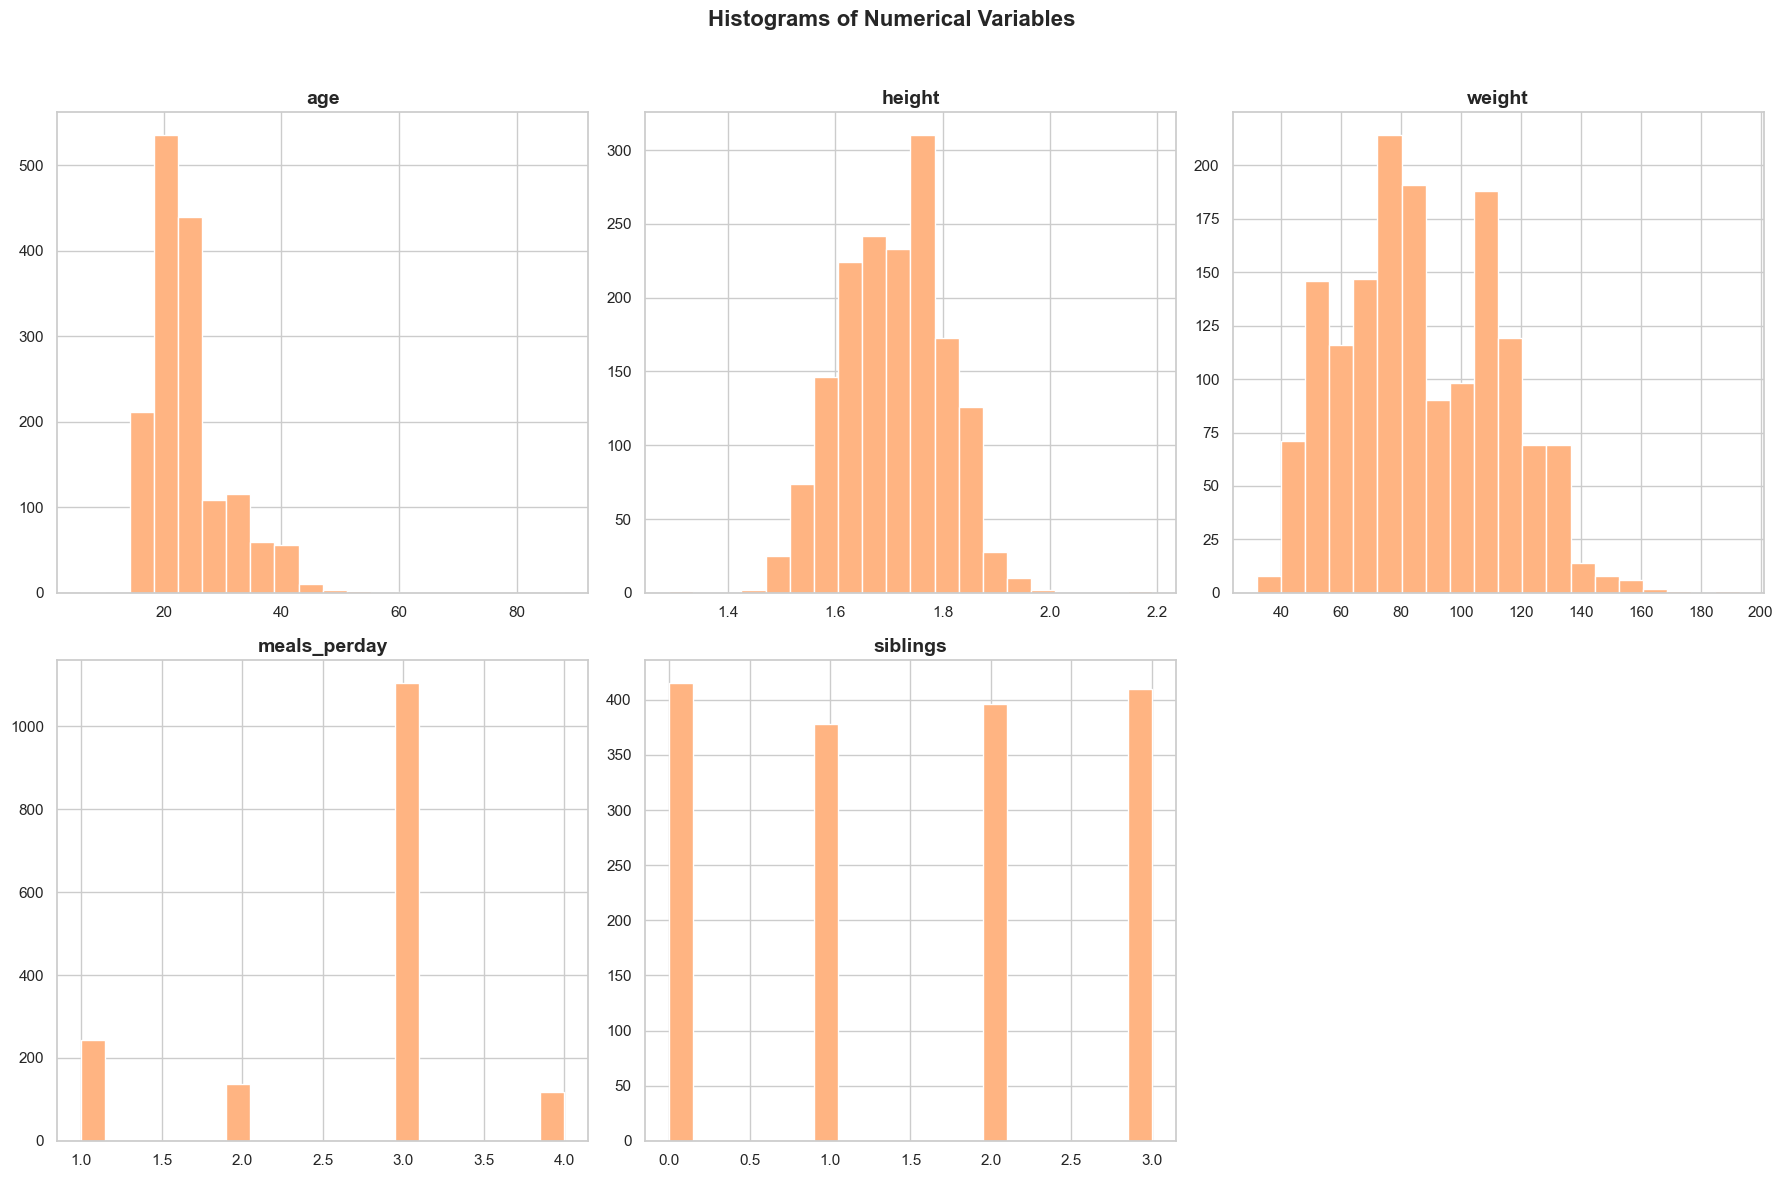

In [ ]:
# Set aesthetic plot styles and color palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel")

# Create subplots for histograms of numerical variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Histograms of Numerical Variables", fontsize=16, fontweight='bold')

for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 3)
    obesity_train_raw[column].hist(bins=20, ax=axes[row, col], color=palette[1])
    axes[row, col].set_title(column, fontsize=14, fontweight='bold')

# Remove empty subplot if the number of numerical columns is less than the grid size
if len(numerical_columns) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


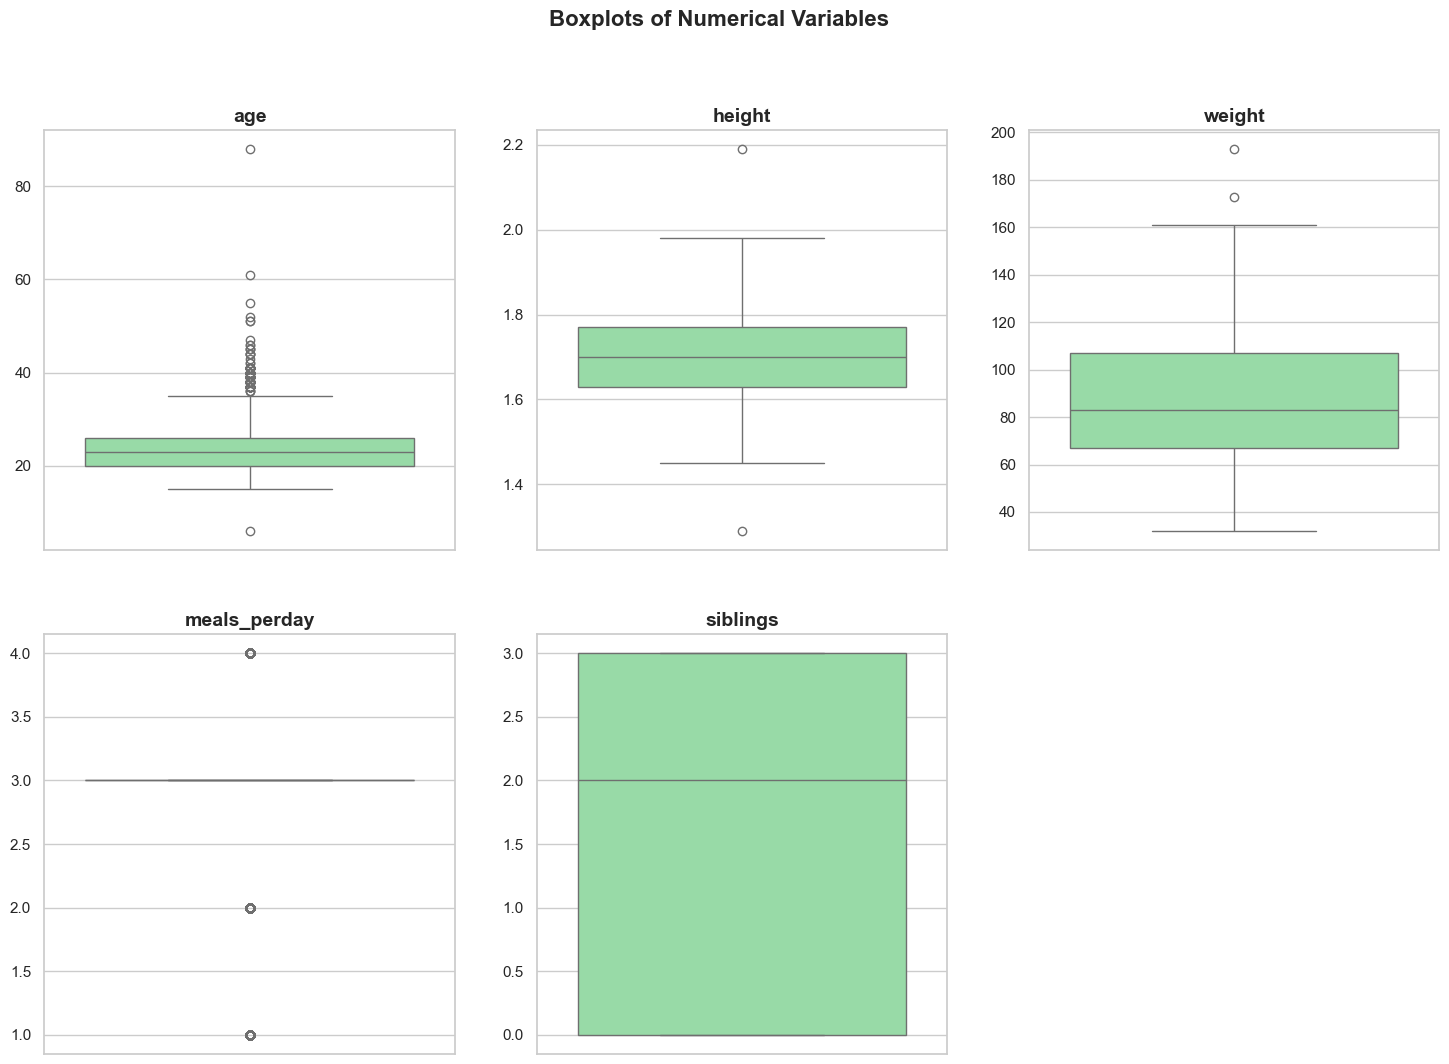

In [9]:
# Separate boxplots for each numerical variable with customization on a single canvas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Boxplots of Numerical Variables", fontsize=16, fontweight='bold')

for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 3)
    sns.boxplot(data=obesity_train_raw, y=column, color=palette[2], ax=axes[row, col])
    axes[row, col].set_title(column, fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel(None)

# Remove empty subplot if the number of numerical columns is less than the grid size
if len(numerical_columns) < 6:
    fig.delaxes(axes[1, 2])

plt.show()

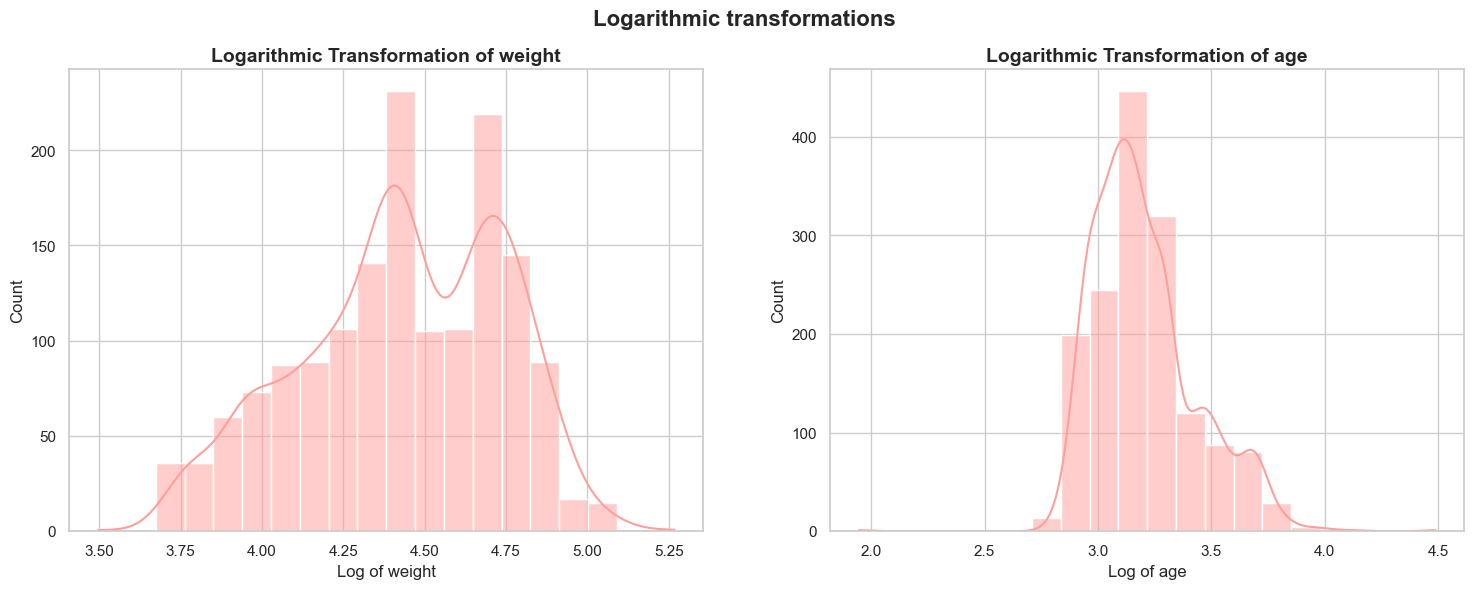

In [10]:
# Logarithmic transformation for weight and age variables

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("Logarithmic transformations", fontsize=16, fontweight='bold')

log_transform_columns = ['weight', 'age']  # Example variables to transform

for i, column in enumerate(log_transform_columns):
    sns.histplot(np.log1p(obesity_train_raw[column]), bins=20, kde=True, color=palette[3], ax=axes[i])
    axes[i].set_title(f'Logarithmic Transformation of {column}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(f'Log of {column}', fontsize=12)

plt.show()

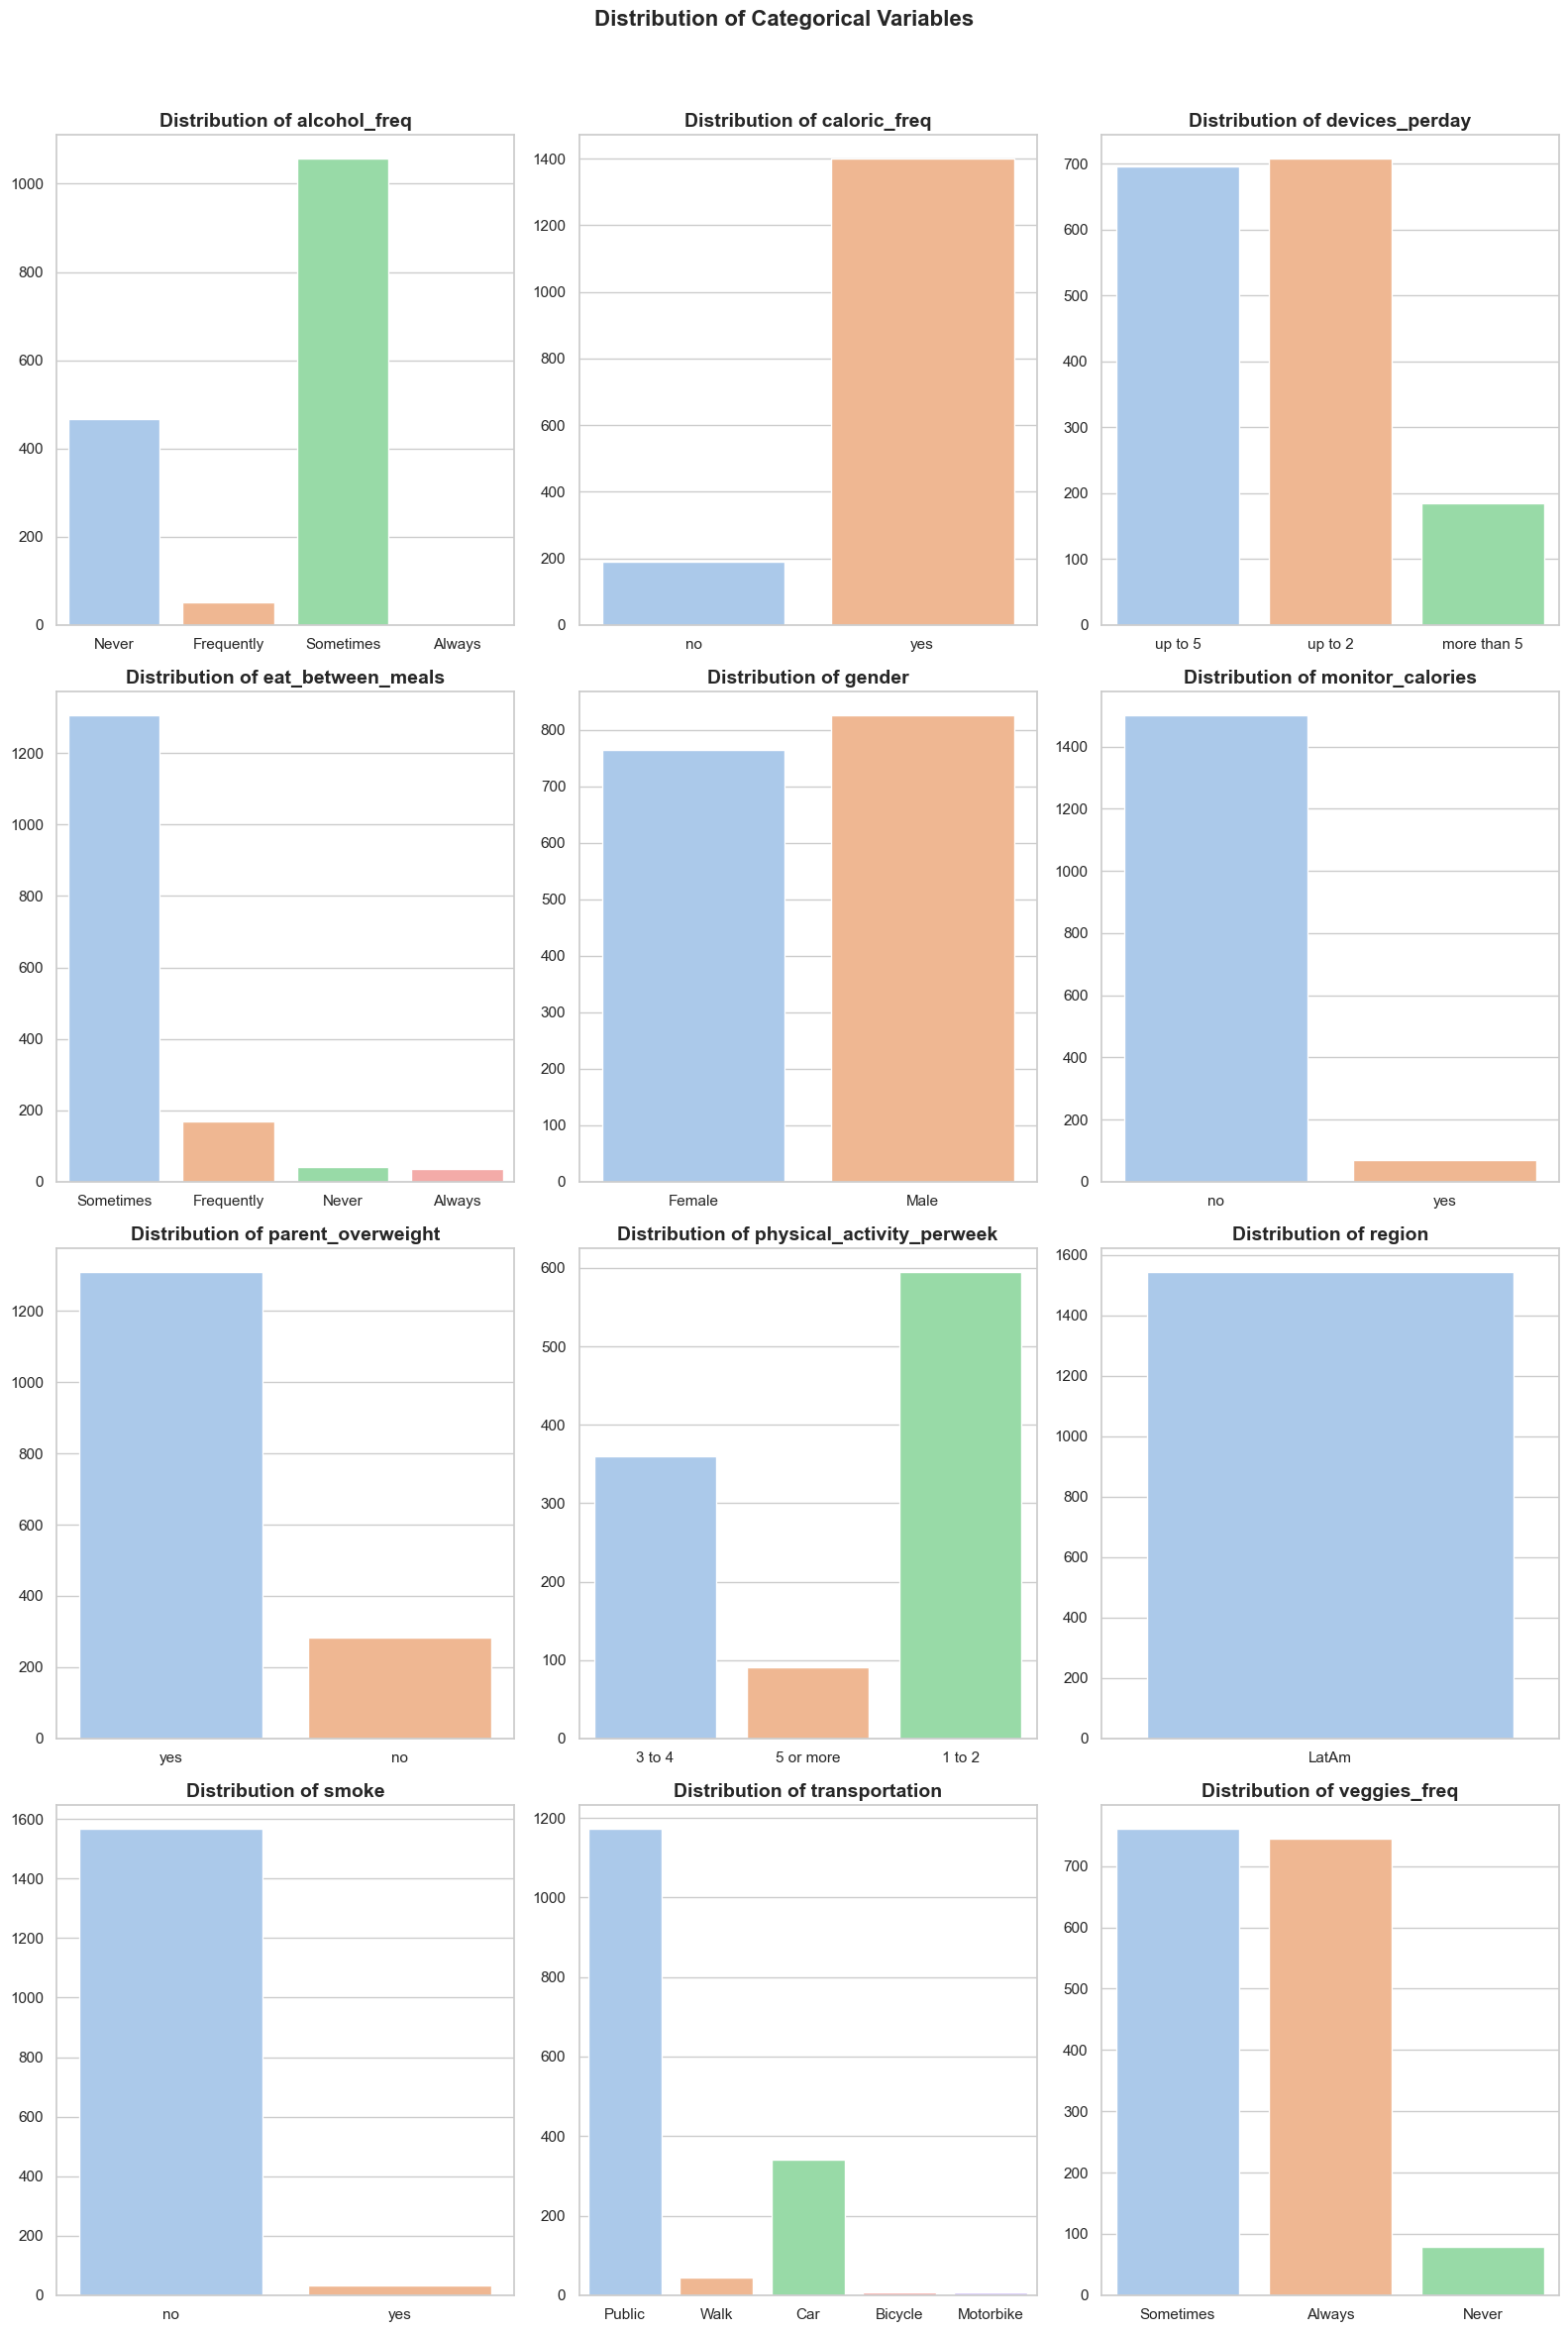

In [11]:
# Ordered countplots for categorical variables

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 24))
fig.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold')

for ax, var in zip(axes.flatten(), obesity_train_raw.select_dtypes(include='object').columns):
    sns.countplot(x=var, data=obesity_train_raw, palette="pastel", ax=ax)
    ax.set_title(f'Distribution of {var}', fontsize=14, fontweight='bold')
    ax.set_xlabel(None)
    ax.set_ylabel(None)

# Remove any empty subplots
for i in range(len(obesity_train_raw.select_dtypes(include='object').columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


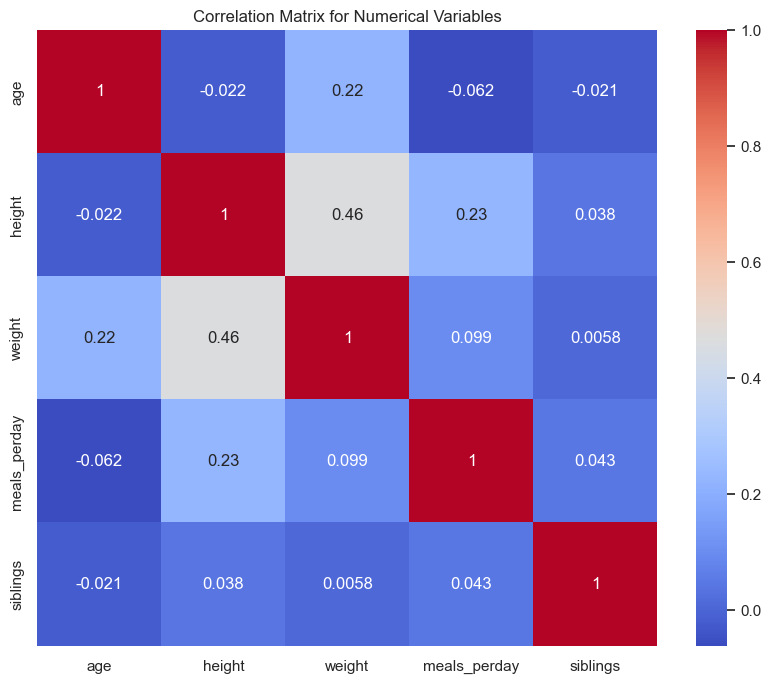

In [12]:
# Heatmap of correlation for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(obesity_train_raw[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

<a class="anchor" id="">

# 3. Modify data (Data preparation)

</a>

<img src="../image/step3.png" style="height:60px">

Use this section to apply transformations to your dataset.

Remember that your decisions at this step should be exclusively informed by your **training data**. While you will need to split your data between training and validation, how that split will be made and how to apply the approppriate transformations will depend on the type of model assessment solution you select for your project (each has its own set of advantages and disadvantages that you need to consider). **Please find a list of possible methods for model assessment below**:

1. **Holdout method**
2. **Repeated Holdout method**
3. **Cross-Validation**

__Note:__ Instead of creating different sections for the treatment of training and validation data, you can make the transformations in the same cell. There is no need to create a specific section for that.

### 3.1. Data Preparation

In [27]:
# Drop the 'marrital_status' and 'region' columns from the dataset
obesity_train = obesity_train_raw.drop(columns=['marrital_status', 'region'])
obesity_test = obesity_test_raw.drop(columns=['marrital_status', 'region'])

In [28]:
obesity_train.set_index('id', inplace=True)
obesity_test.set_index('id', inplace=True)

In [30]:
def calculate_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

age_outliers = calculate_outliers_iqr(obesity_train, 'age')
weight_outliers = calculate_outliers_iqr(obesity_train, 'weight')
height_outliers = calculate_outliers_iqr(obesity_train, 'height')

print(f"Age outliers:{age_outliers}\n")
print(f"Weight outliers:{weight_outliers}\n")
print(f"Height outliers:{height_outliers}\n")


Age outliers:(11.0, 35.0)

Weight outliers:(7.0, 167.0)

Height outliers:(1.4199999999999997, 1.9800000000000002)



In [32]:
def calculate_outliers_zscore(df, column):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    return lower_bound, upper_bound

age_outliers_zscore = calculate_outliers_zscore(obesity_train, 'age')
weight_outliers_zscore = calculate_outliers_zscore(obesity_train, 'weight')
height_outliers_zscore = calculate_outliers_zscore(obesity_train, 'height')

print(f"Age outliers based on Z-score: {age_outliers_zscore}\n")
print(f"Weight outliers based on Z-score: {weight_outliers_zscore}\n")
print(f"Height outliers based on Z-score: {height_outliers_zscore}\n")

Age outliers based on Z-score: (4.9214904752265625, 43.76847716231389)

Weight outliers based on Z-score: (8.739336205795198, 165.17337239497505)

Height outliers based on Z-score: (1.4174056860550368, 1.9908097178272426)



In [37]:
from sklearn.neighbors import LocalOutlierFactor

data_to_check = obesity_train[['age', 'height', 'weight']].dropna()

lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)

outlier_labels = lof.fit_predict(data_to_check)

outliers_knn = data_to_check[outlier_labels == -1]

print(outliers_knn)

       age  height  weight
id                        
10    27.0    1.93   102.0
246   23.0    1.72    76.0
283   19.0    1.80    60.0
316   33.0    1.83   113.0
375   19.0    1.80    60.0
...    ...     ...     ...
1578  22.0    1.72   132.0
1598  26.0    1.65   112.0
1602  26.0    1.61   105.0
1605  21.0    1.72   133.0
1607  21.0    1.73   131.0

[75 rows x 3 columns]


In [24]:
# Removing outliers based on IQR for age and weight and survey information
outliers = obesity_train[
    ((obesity_train['age'] < 16) & ~(obesity_train['age'].isna())) |
    ((obesity_train['age'] > 35) & ~(obesity_train['age'].isna())) |
    ((obesity_train['weight'] > 167) & ~(obesity_train['weight'].isna()))
]
obesity_train.drop(outliers.index, inplace=True)
obesity_train.reset_index(drop=True, inplace=True)

In [25]:
obesity_train.shape # Shape adds up to our expectation (6 rows deleted) 1611 -> 1605 rows

(1491, 18)

# Encoding categorical data

In [38]:
# Identify and separate categorical and numerical columns
categorical_columns = obesity_train.select_dtypes(include='object').columns
numerical_columns = obesity_train.select_dtypes(exclude='object').columns

In [39]:
hashmap = {
"Never": 0,
"Sometimes": 1,
"Frequently": 2,
"Always": 3,

"No Activity": 0,
"up to 2": 1,
"up to 5": 2,
"more than 5": 3,

"less than 1": 1,
"1 to 2": 2,
"more than 2": 3,
"3 to 4": 4,
"5 or more": 5,

"Bicycle": 1,
"Car": 4,
"Motorbike": 3,
"Public": 2,
"Walk": 0,

"no": 0,
"yes": 1,

"Male": 0,
"Female": 1
}

In [40]:
# Manually encode data

cat_columns= ['alcohol_freq',
 'caloric_freq',
 'devices_perday',
 'eat_between_meals',
 'gender',
 'monitor_calories',
 'parent_overweight',
 'physical_activity_perweek',
 'smoke',
 'transportation',
 'veggies_freq',
 'water_daily',
 'meals_perday',
 "siblings"]

for column in cat_columns:
    obesity_train[column] = obesity_train[column].replace(hashmap)

In [41]:
obesity_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1611 entries, 1 to 1611
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        1545 non-null   float64
 1   alcohol_freq               1575 non-null   float64
 2   caloric_freq               1591 non-null   float64
 3   devices_perday             1589 non-null   float64
 4   eat_between_meals          1552 non-null   float64
 5   gender                     1591 non-null   float64
 6   height                     1597 non-null   float64
 7   meals_perday               1602 non-null   float64
 8   monitor_calories           1572 non-null   float64
 9   parent_overweight          1591 non-null   float64
 10  physical_activity_perweek  1046 non-null   float64
 11  siblings                   1599 non-null   float64
 12  smoke                      1599 non-null   float64
 13  transportation             1571 non-null   float64
 1

In [ ]:
obesity_train_encoded = obesity_train.copy()
obesity_train_encoded.isna().sum()

Handling missing values

In [ ]:
# ASSUMPTION: There is no 0 value in the scope. We assume nulls are the people who dont work out

obesity_train['physical_activity_perweek'].fillna(0, inplace=True) 

In [ ]:
X = obesity_train_encoded.drop(columns='obese_level')
y = obesity_train_encoded[['obese_level']]

In [ ]:
X.isna().sum()

In [43]:
targets_one_hot = []
targets_ordinal = ["alcohol_freq", "devices_perday", "eat_between_meals", "monitor_calories", "physical_activity_perweek",
                   "veggies_freq", "water_daily", "gender", "caloric_freq" ,"transportation", "parent_overweight", "smoke"]
encode_config = {"onehot": targets_one_hot, "ordinal": targets_ordinal}

In [ ]:
"""
def encode_data(data_train, data_test, targets_one_hot, targets_ordinal):
    """
    Encodes any type of data in onehot and ordinal, using a list of columns to specify which to encode.
    Data: your dataframe
    onehot_list: list of strings representing the columns to encode with 1hot
    ordinal_list: analogous as above, except it's with ordinal encoding.
    
    RETVAL: Two dataframes with the encoded data. Transformed columns' names will be deleted and replaced with the encoded ones, following this naming convention:
    - If onehot, it will follow the format target_transformed_column
    - If ordinal, it will follow the format target_encoded
    """
    encoders_used = {}

    encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')  # drop to avoid multicollinearity
    
    encoded_train = data_train.copy()
    encoded_test = data_test.copy()
    
    for target in targets_one_hot:
        encoded_train[target] = encoded_train[target].astype("str").replace("nan", np.nan)
        encoded_test[target] = encoded_test[target].astype("str").replace("nan", np.nan)
        
        # Fit encoder on training data
        target_encoder = encoder.fit(encoded_train[[target]])
        
        # Transform training data
        transformed_train = target_encoder.transform(encoded_train[[target]])
        transformed_train = pd.DataFrame(transformed_train, columns=[f"{target}_{col}" for col in target_encoder.categories_[0][1:]])
        transformed_train.set_index(encoded_train.index, inplace=True)
        
        # Transform test data
        transformed_test = target_encoder.transform(encoded_test[[target]])
        transformed_test = pd.DataFrame(transformed_test, columns=[f"{target}_{col}" for col in target_encoder.categories_[0][1:]])
        transformed_test.set_index(encoded_test.index, inplace=True)
        
        # Merge columns
        encoded_train = encoded_train.drop(columns=[target]).join(transformed_train)
        encoded_test = encoded_test.drop(columns=[target]).join(transformed_test)
        
        encoders_used[target] = encoder
    
    for target in targets_ordinal:
        encoded_train[target] = encoded_train[target].astype("str").replace("nan", np.nan)
        encoded_test[target] = encoded_test[target].astype("str").replace("nan", np.nan)
        
        # Fit encoder on training data
        target_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)
        target_encoder.fit(encoded_train[[target]])
        
        # Transform training data
        transformed_train = target_encoder.transform(encoded_train[[target]])
        encoded_train[f"{target}"] = transformed_train
        
        # Transform test data
        transformed_test = target_encoder.transform(encoded_test[[target]])
        encoded_test[f"{target}"] = transformed_test

        encoders_used[target] = target_encoder
        
    
    return encoded_train, encoded_test, encoders_used

# Encode the data
obesity_train_encoded, obesity_test_encoded, encoders_used = encode_data(obesity_train, obesity_test, encode_config['onehot'], encode_config['ordinal'])
"""

# Handling Missing Values

In [167]:
obesity_train_encoded.head(3)

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
0,21.0,2.0,0.0,2.0,3.0,0.0,1.62,3.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,0.0,64.0,Normal_Weight
1,23.0,1.0,0.0,2.0,3.0,1.0,1.80,3.0,0.0,1.0,2.0,0.0,0.0,3.0,2.0,0.0,77.0,Normal_Weight
2,NaN,1.0,0.0,1.0,3.0,1.0,1.80,3.0,0.0,0.0,2.0,2.0,0.0,4.0,0.0,0.0,87.0,Overweight_Level_I


In [168]:
# Split the data into training and testing sets
X = obesity_train_encoded.drop(columns='obese_level')
y = obesity_train_encoded['obese_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [169]:
X.isna().sum()

age                          65
alcohol_freq                 36
caloric_freq                 20
devices_perday               21
eat_between_meals            59
gender                       20
height                       13
meals_perday                  9
monitor_calories             39
parent_overweight            20
physical_activity_perweek     0
siblings                     12
smoke                        12
transportation               40
veggies_freq                 26
water_daily                  34
weight                       53
dtype: int64

In [170]:
# Create copies for KNN imputation
data_knnimputer_train = X_train.copy()
data_knnimputer_test = X_test.copy()

# Specify the columns to scale
numerical_columns_features = numerical_columns

# Scale the data for KNN imputation
scaler = StandardScaler()
data_knnimputer_train[numerical_columns_features] = scaler.fit_transform(data_knnimputer_train[numerical_columns_features])
data_knnimputer_test[numerical_columns_features] = scaler.transform(data_knnimputer_test[numerical_columns_features])

# Perform KNN imputation
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
data_knnimputer_train[numerical_columns_features] = knn_imputer.fit_transform(data_knnimputer_train[numerical_columns_features])
data_knnimputer_test[numerical_columns_features] = knn_imputer.transform(data_knnimputer_test[numerical_columns_features])

# Inverse transform to original scale
data_knnimputer_train[numerical_columns_features] = scaler.inverse_transform(data_knnimputer_train[numerical_columns_features])
data_knnimputer_test[numerical_columns_features] = scaler.inverse_transform(data_knnimputer_test[numerical_columns_features])

# Check for any remaining missing values
print(data_knnimputer_train.isna().sum(), "\n\n", data_knnimputer_test.isna().sum())

age                           0
alcohol_freq                 24
caloric_freq                 14
devices_perday               18
eat_between_meals            46
gender                       15
height                        0
meals_perday                  0
monitor_calories             24
parent_overweight            17
physical_activity_perweek     0
siblings                      0
smoke                        10
transportation               22
veggies_freq                 17
water_daily                  29
weight                        0
dtype: int64 

 age                           0
alcohol_freq                 12
caloric_freq                  6
devices_perday                3
eat_between_meals            13
gender                        5
height                        0
meals_perday                  0
monitor_calories             15
parent_overweight             3
physical_activity_perweek     0
siblings                      0
smoke                         2
transportation          

Feature engineering

In [171]:
def classify_bmi_comprehensive(row):
    """
    Classify BMI based on age and BMI value.

    Input:
    row: A Pandas row with 'weight', 'height', and 'age' columns.

    Output:
    Returns a string that classifies the individual into BMI categories.
    """
    # Check if weight and height are valid
    if row['height'] <= 0 or row['weight'] <= 0:
        return 'Invalid data'

    # Calculate BMI
    bmi = row['weight'] / (row['height'] ** 2)

    # Age group: Children (2-19 years)
    if 2 <= row['age'] < 20:
        if bmi < 14:
            return "Underweight"
        elif 14 <= bmi < 18:
            return "Healthy Weight"
        elif 18 <= bmi < 21:
            return "Overweight"
        else:
            return "Obese Class 1"

    # Age group: Adults (20-64 years)
    elif 20 <= row['age'] < 65:
        if bmi < 18.5:
            return "Underweight"
        elif 18.5 <= bmi < 25:
            return "Healthy Weight"
        elif 25 <= bmi < 30:
            return "Overweight"
        elif 30<= bmi < 35:
            return "Obese Class 1"
        elif 35 <= bmi < 40:
            return "Obese Class 2"
        else:
            return "Obese Class 3"

In [172]:
data_knnimputer_train['bmi_class'] = data_knnimputer_train.apply(lambda row: classify_bmi_comprehensive(row), axis=1)

data_knnimputer_test['bmi_class'] = data_knnimputer_test.apply(lambda row: classify_bmi_comprehensive(row), axis=1)

In [173]:
ordinal_encoder = OrdinalEncoder()
data_knnimputer_train['bmi_class'] = ordinal_encoder.fit_transform(data_knnimputer_train[['bmi_class']])
data_knnimputer_test['bmi_class'] = ordinal_encoder.transform(data_knnimputer_test[['bmi_class']])

Impute categorical

In [174]:
data_knnimputer_train.head(2)

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,transportation,veggies_freq,water_daily,weight,bmi_class
1227,39.0,3.0,1.0,1.0,3.0,1.0,1.75,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,119.0,2.0
112,30.0,3.0,1.0,1.0,3.0,0.0,1.62,3.0,0.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0,67.4,4.0


In [175]:
categorical_columns = categorical_columns[:-1]

In [176]:
categorical_columns

Index(['alcohol_freq', 'caloric_freq', 'devices_perday', 'eat_between_meals',
       'gender', 'monitor_calories', 'parent_overweight',
       'physical_activity_perweek', 'smoke', 'transportation', 'veggies_freq',
       'water_daily'],
      dtype='object')

In [177]:
# Initialize IterativeImputer with KNeighborsClassifier for categorical data imputation
iterative_imputer = IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=5), max_iter=10, random_state=42, 
                                     skip_complete=True)

# Perform imputation on the encoded categorical data
data_knnimputer_train_imputed = iterative_imputer.fit_transform(data_knnimputer_train)
data_knnimputer_test_imputed = iterative_imputer.transform(data_knnimputer_test)

# Convert back to DataFrame and assign original column names
data_knnimputer_train = pd.DataFrame(data_knnimputer_train_imputed, columns=data_knnimputer_train.columns)
data_knnimputer_test = pd.DataFrame(data_knnimputer_test_imputed, columns=data_knnimputer_test.columns)

# Check for any remaining missing values
print(data_knnimputer_train[categorical_columns].isna().sum(), "\n\n", data_knnimputer_test[categorical_columns].isna().sum())

alcohol_freq                 0
caloric_freq                 0
devices_perday               0
eat_between_meals            0
gender                       0
monitor_calories             0
parent_overweight            0
physical_activity_perweek    0
smoke                        0
transportation               0
veggies_freq                 0
water_daily                  0
dtype: int64 

 alcohol_freq                 0
caloric_freq                 0
devices_perday               0
eat_between_meals            0
gender                       0
monitor_calories             0
parent_overweight            0
physical_activity_perweek    0
smoke                        0
transportation               0
veggies_freq                 0
water_daily                  0
dtype: int64


In [178]:
encoded_train = data_knnimputer_train.copy()
encoded_test = data_knnimputer_test.copy()

In [179]:
encoded_train

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,transportation,veggies_freq,water_daily,weight,bmi_class
0,39.0,3.0,1.0,1.0,3.0,1.0,1.75,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,119.0,2.0
1,30.0,3.0,1.0,1.0,3.0,0.0,1.62,3.0,0.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0,67.4,4.0
2,25.0,2.0,1.0,2.0,3.0,1.0,1.81,4.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,86.0,4.0
3,32.0,3.0,1.0,1.0,3.0,0.0,1.57,3.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,57.0,0.0
4,18.0,2.0,1.0,0.0,3.0,1.0,1.78,3.0,0.0,1.0,2.0,2.0,0.0,1.0,2.0,0.0,57.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,18.0,3.0,1.0,2.0,3.0,1.0,1.82,2.0,0.0,1.0,1.0,1.0,0.0,3.0,2.0,0.0,108.0,1.0
1119,18.0,3.0,1.0,0.0,3.0,0.0,1.46,3.0,1.0,0.0,0.0,1.0,0.0,3.0,2.0,1.0,56.0,1.0
1120,29.0,3.0,1.0,1.0,3.0,1.0,1.62,3.0,0.0,1.0,0.0,3.0,0.0,3.0,1.0,1.0,89.0,1.0
1121,21.0,2.0,1.0,2.0,3.0,1.0,1.76,4.0,0.0,1.0,2.0,3.0,0.0,3.0,0.0,2.0,55.0,5.0


### 3.3. Scaling

In [180]:
# Value scaling
from sklearn.preprocessing import StandardScaler, RobustScaler

scale_age = StandardScaler().fit(encoded_train[["age"]])
scale_height = StandardScaler().fit(encoded_train[["height"]])
scale_weight = StandardScaler().fit(encoded_train[["weight"]]) # Statistical analysis justifies the need to use RobustScaler on this one

dfs = [encoded_train, encoded_test] # Transform both dataframes
for df in dfs:
    new_age = scale_age.transform(df[["age"]])
    new_height = scale_height.transform(df[["height"]])
    new_weight = scale_weight.transform(df[["weight"]])

    # Replace columns
    df["age"] = new_age
    df["height"] = new_height
    df["weight"] = new_weight


In [181]:
obesity_train_preproc = encoded_train.copy()
obesity_test_preproc = encoded_test.copy()

In [182]:
inverted_train = obesity_train_preproc.copy()
inverted_test = obesity_test_preproc.copy()

In [183]:
for x in encoders_used:
    inverted_train[[x]] = encoders_used[x].inverse_transform(inverted_train[[x]])
    inverted_test[[x]] = encoders_used[x].inverse_transform(inverted_test[[x]])

inverted_train['Oweight'] = scale_weight.inverse_transform(inverted_train[['weight']])
inverted_test['Oweight'] = scale_weight.inverse_transform(inverted_test[['weight']])

In [184]:
def m(x):
    if (x == "1 to 2"):
        return 1.5
    
    if (x == "less than 1"):
        return .5
    
    if (x == "more than 2"):
        return 2.5
    
    if (x == "0"):
        return 0.5
    
    if (x == "3 to 4"):
        return 3.5
    
    if (x == "5 or more"):
        return 5.5
    
    if (x == "up to 2"):
        return 2 * 7
    
    if (x == "up to 5"):
        return 5 * 7
    
    if (x == "more than 5"):
        return 7 * 7

inverted_train['water_numeric'] = inverted_train['water_daily'].apply(lambda row: m(row))
inverted_test['water_numeric'] = inverted_test['water_daily'].apply(lambda row: m(row))

inverted_train['physical_num'] = inverted_train['physical_activity_perweek'].apply(lambda row: m(row))
inverted_train['devices_num'] = inverted_train['devices_perday'].apply(lambda row: m(row))

inverted_test['physical_num'] = inverted_test['physical_activity_perweek'].apply(lambda row: m(row))
inverted_test['devices_num'] = inverted_test['devices_perday'].apply(lambda row: m(row))

In [185]:
inverted_train['Water_Intake_per_kg'] = inverted_train['water_numeric']/inverted_train['Oweight']
inverted_test['Water_Intake_per_kg'] = inverted_test['water_numeric']/inverted_test['Oweight']

inverted_train['total_activity_score'] = inverted_train['physical_num'] * inverted_train['devices_num']
inverted_test['total_activity_score'] = inverted_test['physical_num'] * inverted_test['devices_num']


In [186]:
obesity_train_preproc['Water_Intake_per_kg'] = inverted_train['Water_Intake_per_kg']
obesity_test_preproc['Water_Intake_per_kg'] = inverted_test['Water_Intake_per_kg']

obesity_train_preproc['total_activity_score'] = inverted_train['total_activity_score']
obesity_test_preproc['total_activity_score'] = inverted_test['total_activity_score']


### 3.4. Feature Selection

<a class="anchor" id="">

# 4 & 5. Model & Assess (Modelling and Assessment)

</a>

<img src="../image/step4.png" style="height:60px">

### 4.1. Model Selection

In this section you should take the time to train different predictive algorithms with the data that got to this stage and **use the approppriate model assessment metrics to decide which model you think is the best to address your problem**.

**You are expected to present on your report the model performances of the different algorithms that you tested and discuss what informed your choice for a specific algorithm**

In [187]:
obesity_train_preproc.head(3)

,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,smoke,transportation,veggies_freq,water_daily,weight,bmi_class,Water_Intake_per_kg,total_activity_score
0,2.403025,3.0,1.0,1.0,3.0,1.0,0.507679,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.259404,2.0,0.012605,7.0
1,0.926032,3.0,1.0,1.0,3.0,0.0,-0.873383,3.0,0.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0,-0.750379,4.0,0.022255,49.0
2,0.105481,2.0,1.0,2.0,3.0,1.0,1.145092,4.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.025922,4.0,0.017442,17.5


In [188]:
X_train = obesity_train_preproc.copy()
X_val = obesity_test_preproc.copy()
y_val = y_test.copy()

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Evaluate the model on the validation data
y_pred_log_reg = log_reg.predict(X_val)
print(classification_report(y_val, y_pred_log_reg))

                     precision    recall  f1-score   support

Insufficient_Weight       0.68      0.66      0.67        59
      Normal_Weight       0.62      0.50      0.55        66
     Obesity_Type_I       0.71      0.75      0.73        80
    Obesity_Type_II       0.76      0.89      0.82        70
   Obesity_Type_III       0.97      0.97      0.97        72
 Overweight_Level_I       0.62      0.62      0.62        68
Overweight_Level_II       0.68      0.66      0.67        67

           accuracy                           0.73       482
          macro avg       0.72      0.72      0.72       482
       weighted avg       0.72      0.73      0.72       482



In [190]:

tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

print(classification_report(y_val, tree.predict(X_val)))

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.95      0.93        59
      Normal_Weight       0.79      0.74      0.77        66
     Obesity_Type_I       0.93      0.94      0.93        80
    Obesity_Type_II       0.93      0.94      0.94        70
   Obesity_Type_III       0.96      0.97      0.97        72
 Overweight_Level_I       0.76      0.79      0.78        68
Overweight_Level_II       0.89      0.82      0.85        67

           accuracy                           0.88       482
          macro avg       0.88      0.88      0.88       482
       weighted avg       0.88      0.88      0.88       482



In [191]:
from sklearn.ensemble import RandomForestClassifier
class_weights = {
    'Insufficient_Weight': 1.0,
    'Normal_Weight': 10.0,
    'Overweight_Level_I': 10.0,
    'Overweight_Level_II': 1.0,
    'Obesity_Type_I': 1.0,
    'Obesity_Type_II': 1.0,
    'Obesity_Type_III': 1.0
}
tree_rf = RandomForestClassifier(random_state=42, class_weight=class_weights)

tree_rf.fit(X_train, y_train)

print(classification_report(y_val, tree_rf.predict(X_val)))

tree_rf.score(X_train, y_train)

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94        59
      Normal_Weight       0.91      0.88      0.89        66
     Obesity_Type_I       0.93      0.97      0.95        80
    Obesity_Type_II       0.96      0.96      0.96        70
   Obesity_Type_III       0.99      0.97      0.98        72
 Overweight_Level_I       0.95      0.82      0.88        68
Overweight_Level_II       0.88      0.97      0.92        67

           accuracy                           0.93       482
          macro avg       0.93      0.93      0.93       482
       weighted avg       0.93      0.93      0.93       482



1.0

In [192]:
from sklearn.ensemble import GradientBoostingClassifier

tree_gb = GradientBoostingClassifier(random_state=42)

tree_gb.fit(X_train, y_train)

print(classification_report(y_val, tree_gb.predict(X_val)))

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.95      0.93        59
      Normal_Weight       0.89      0.83      0.86        66
     Obesity_Type_I       0.93      0.95      0.94        80
    Obesity_Type_II       0.97      0.97      0.97        70
   Obesity_Type_III       1.00      0.97      0.99        72
 Overweight_Level_I       0.91      0.85      0.88        68
Overweight_Level_II       0.86      0.93      0.89        67

           accuracy                           0.92       482
          macro avg       0.92      0.92      0.92       482
       weighted avg       0.92      0.92      0.92       482



Feature selection

In [193]:
nof_list = np.arange(1, len(X_train.columns))
high_score = float('-inf')  # Higher is better for accuracy
nof = 0  # Variable to store the optimum features
score_list = []

# Store the best selected features for display
best_features = None

for n in range(len(nof_list)):
    model = tree_rf
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_val_rfe = rfe.transform(X_val)

    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_val_rfe)
    
    # Use F1 score with 'macro' average for multiclass classification
    score = f1_score(y_val, y_pred, average='macro')
    score_list.append(score)
    
    # Check if this number of features gives a better score
    if score > high_score:  # Higher is better for accuracy
        high_score = score
        nof = nof_list[n]
        best_features = rfe.get_support()  # Get the mask of selected features

# Display the best results
print("Optimum number of features: %d" % nof)
print("Highest F1 score with %d features: %f" % (nof, high_score))

# Convert columns to a numpy array before using the boolean mask
selected_feature_names = X_train.columns.to_numpy()[best_features]
print("Selected features with %d features:" % nof)
print(selected_feature_names)

Optimum number of features: 16
Highest F1 score with 16 features: 0.943165
Selected features with 16 features:
['age' 'alcohol_freq' 'caloric_freq' 'devices_perday' 'eat_between_meals'
 'gender' 'height' 'meals_perday' 'parent_overweight'
 'physical_activity_perweek' 'transportation' 'veggies_freq' 'weight'
 'bmi_class' 'Water_Intake_per_kg' 'total_activity_score']


### 4.2. Model Optimization

After selecting the best algorithm (set of algorithms), you can try to optimize the performance of your model by fiddling with the algorithms' hyper-parameters and select the options that result on the best overall performance.

Possible ways of doing this can be through:
1. [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
2. [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

**While you are not required to show the results of all combinations of hyperparameters that you tried, you should at least discuss the what were the possible combinations used and which of them resulted in your best performance**

In [ ]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the encoder on y_train and transform both y_train and y_val
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_categorical('max_depth', [10, 30, 50, None])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    
    # Initialize RandomForestClassifier with suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42
    )
    
    # Use cross-validation with F1 score for classification
    f1 = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='f1_macro', n_jobs=-1)
    return f1.mean()

# Set up Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Retrieve the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train model with best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train_encoded)

# Evaluate on training and validation sets
print('Train F1 score:', f1_score(y_train_encoded, best_rf.predict(X_train), average='macro'))
print('Test F1 score:', f1_score(y_val_encoded, best_rf.predict(X_val), average='macro'))

[I 2024-10-29 15:18:41,531] A new study created in memory with name: no-name-f1462281-ba36-41da-9395-93ab8270a0a6


[I 2024-10-29 15:18:49,575] Trial 0 finished with value: 0.9330322948976159 and parameters: {'n_estimators': 261, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.9330322948976159.
[I 2024-10-29 15:18:54,821] Trial 1 finished with value: 0.9389028948768461 and parameters: {'n_estimators': 307, 'max_depth': None, 'min_samples_split': 6, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 1 with value: 0.9389028948768461.
[I 2024-10-29 15:18:59,489] Trial 2 finished with value: 0.928104531936126 and parameters: {'n_estimators': 249, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 1 with value: 0.9389028948768461.
[I 2024-10-29 15:19:01,486] Trial 3 finished with value: 0.9307449613283236 and parameters: {'n_estimators': 452, 'max_depth': 50, 'min_samples_split': 7, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 1 with value: 0.9389028948768461.
[I 2024-10-2

Best Parameters: {'n_estimators': 265, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': False}
Train F1 score: 1.0
Test F1 score: 0.9332122409990211


In [ ]:
print(classification_report(y_val_encoded, best_rf.predict(X_val)))
print(label_encoder.classes_)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        59
           1       0.91      0.88      0.89        66
           2       0.90      0.96      0.93        80
           3       0.97      0.94      0.96        70
           4       0.99      0.97      0.98        72
           5       0.90      0.88      0.89        68
           6       0.93      0.97      0.95        67

    accuracy                           0.93       482
   macro avg       0.94      0.93      0.93       482
weighted avg       0.93      0.93      0.93       482

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [ ]:
importances = best_rf.feature_importances_

importances_df = pd.DataFrame(importances, index=X_train.columns, columns=['importance'])
importances_df = importances_df.sort_values('importance', ascending=False)
importances_df

,importance
weight,0.290096
bmi_class,0.174018
age,0.099409
height,0.084612
gender,0.074048
veggies_freq,0.043235
alcohol_freq,0.037146
meals_perday,0.032889
eat_between_meals,0.027859
parent_overweight,0.026884


In [197]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],             # More values to capture varying complexities
    'max_depth': [5, 10, 20, 30],                     # None allows the trees to grow until all leaves are pure or until they contain less than min_samples_split samples
    'min_samples_split': [1, 2, 3,5],              # Common choices for preventing overfitting
    'min_samples_leaf': [1, 2, 4],               # Larger values help with regularization
    'bootstrap': [True, False]                   # Testing both bootstrapped samples and using the entire dataset
}
# Initialize the GridSearchCV with the RandomForestRegressor and the parameter grid with 5-fold cross validation for better overfitting understanding and more robust validation score
grid_search = GridSearchCV(estimator=tree_rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_macro', verbose=2)

grid_search.fit(X_train, y_train) 

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
print('train error: ', f1_score(y_train, best_rf.predict(X_train)))
print('test error: ', f1_score(y_val, best_rf.predict(X_val)))
'''

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [100, 200, 500],             # More values to capture varying complexities\n    \'max_depth\': [5, 10, 20, 30],                     # None allows the trees to grow until all leaves are pure or until they contain less than min_samples_split samples\n    \'min_samples_split\': [1, 2, 3,5],              # Common choices for preventing overfitting\n    \'min_samples_leaf\': [1, 2, 4],               # Larger values help with regularization\n    \'bootstrap\': [True, False]                   # Testing both bootstrapped samples and using the entire dataset\n}\n# Initialize the GridSearchCV with the RandomForestRegressor and the parameter grid with 5-fold cross validation for better overfitting understanding and more robust validation score\ngrid_search = GridSearchCV(estimator=tree_rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring=\'f1_macro\', verbose=2)\n\ngrid_search.fit(X_train, y_train) \n\n# G

### 4.2. Model Optimization

After selecting the best algorithm (set of algorithms), you can try to optimize the performance of your model by fiddling with the algorithms' hyper-parameters and select the options that result on the best overall performance.

Possible ways of doing this can be through:
1. [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
2. [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

**While you are not required to show the results of all combinations of hyperparameters that you tried, you should at least discuss the what were the possible combinations used and which of them resulted in your best performance**

<a class="anchor" id="">

# 5. Deploy

</a>

<img src="image/step5.png" style="height:60px">

### 5.0 Training a final model

You used the previous steps of modelling and assessment to determine what would be best strategies when it comes to preprocessing, scaling, feature selection, algorithm and hyper-parameters you could find.

**By this stage, all of those choices were already made**. For that reason, a split between training and validation is no longer necessary. **A good practice** would be to take the initial data and train a final model with all of the labeled data that you have available.

**Everything is figured by this stage**, so, on a first level all you need to do is replicate the exact preprocessing, scaling and feature selection decisions you made before.<br>
When it comes to the final model, all you have to do is creeate a new instance of your best algorithm with the best parameters that you uncovered (no need to try all algorithms and hyper-parameters again).

### 5.1. Import and Transform your test data

Remember, the test data does not have the `outcome` variable.

### 5.2. Obtain Predictions on the test data from your final model

### 5.3. Create a Dataframe containing the index of each row and its intended prediction and export it to a csv file

Submit the csv file to Kaggle to obtain the model performance of your model on the test data.